In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
class TimeSeriesData():
    def __init__(self,num_points,xmin,xmax):
        self.xmin = xmin
        self.xmax = xmax
        self.num_points = num_points
        self.resolution = (xmax-xmin)/num_points
        self.x_data = np.linspace(xmin,xmax,num_points)
        self.y_true = np.sin(self.x_data)
        
        
    def ret_true(self,x_series):
        return np.sin(x_series)
    
    def next_batch(self,batch_size,steps,return_batch_ts=False):
       
        # grab random starting point for each bach
        rand_start = np.random.rand(batch_size,1)
        
        #convert to be in time series
        ts_start = rand_start * (self.xmax - self.xmin -( steps*self.resolution))
        #create batch time series on the x axis
        batch_ts = ts_start + np.arange(0.0,steps+1) * self.resolution
        #create the y data for the time seies x axis from previous step
        y_batch = np.sin(batch_ts)
        
        #formatting for rnn
        
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1,steps,1) , y_batch[:,1:0].reshape(-1,steps,1), batch_ts
        else:
            return y_batch[:,:-1].reshape(-1,steps,1) , y_batch[:,1:0].reshape(-1,steps,1)

In [7]:
ts_data = TimeSeriesData(250,0,10)

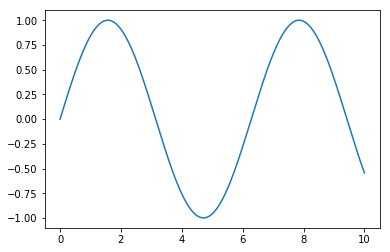

In [8]:
plt.plot(ts_data.x_data,ts_data.y_true)

In [9]:
num_time_steps = 30

In [10]:
y1,y2,ts = ts_data.next_batch(1,num_time_steps,True)

ValueError: x and y must have same first dimension, but have shapes (30,) and (0,)

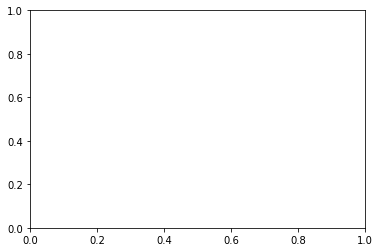

In [14]:
plt.plot(ts.flatten()[1:],y2.flatten(),'*')